# Introduction
This example shows how to create raster and point data sources from `numpy` arrays. It then demonstrates how these different datasets interoperate, and how they can be composited together into a single dataset using a `Compositor`. 

In [1]:
# Set up interactive plotting using matplotlib, and load numpy
# %pylab ipympl
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Import PODPAC dependencies

In [2]:
from podpac.core.data.types import NumpyArray
from podpac.core.compositor import OrderedCompositor
from podpac.core.coordinates import Coordinates

# Create raster data source

In [3]:
class Raster(NumpyArray):
    source = np.linspace(0., 100., 8000).reshape(100, 80)

    def get_native_coordinates(self):
        return Coordinates.grid(lat=(-25, 25, 100),
                                lon=(-20, 20, 80), order=['lat', 'lon'])
raster = Raster()

# Create point data source (points in a line)

In [4]:
class Points(NumpyArray):
    source = np.linspace(0., 100., 100.) + 0.5

    def get_native_coordinates(self):
        return Coordinates.points(lat=(-1, 1, 100), lon=(-15, 15, 100), order=['lat', 'lon'])
points = Points()

# Evaluate raster/points at the points and plot

(-16.714502999695345,
 16.71450299969534,
 -1.1252943340691683,
 1.1252943340691683)

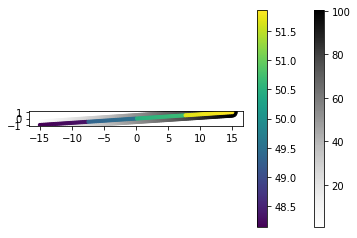

In [5]:
c = points.native_coordinates
o_p = points.execute(c)
o_r = raster.execute(c)
lat = c['lat'].coordinates
lon = c['lon'].coordinates
close('all')
scatter(lon, lat, c=o_p.data, s=100, cmap='Greys'); colorbar()
scatter(lon, lat, c=o_r.data, s=10, cmap='viridis'); colorbar()
axis('scaled')

# Evaluate points/raster at the raster grid and plot

(-20.253164556962027,
 20.253164556962023,
 -25.252525252525253,
 25.252525252525253)

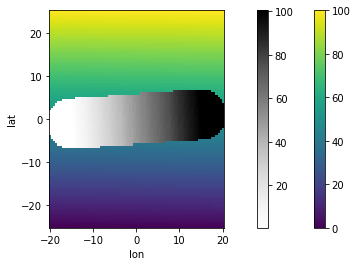

In [6]:
o_p = points.execute(raster.native_coordinates)
o_r = raster.execute(raster.native_coordinates)
figure(2)
o_r.plot(cmap='viridis')
o_p.plot(cmap='Greys')
axis('scaled')

# Composite the two data sources together

In [7]:
composite = OrderedCompositor(sources=np.array([Points(), Raster()]))

# Evaluate compsitor at arbitrary raster grid

(-25.196850393700785,
 25.196850393700785,
 -25.196850393700785,
 25.196850393700785)

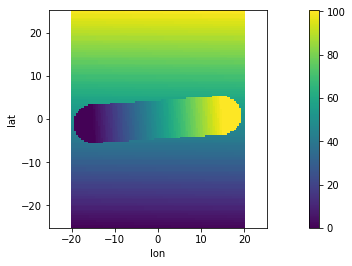

In [8]:
o_c = composite.execute(Coordinates.grid(lat=(-25, 25, 128),
                                         lon=(-25, 25, 128), order=['lat', 'lon']))
figure(3); o_c.plot(); axis('scaled')

## **Note that the size of the point dataset depends on the scale of the requested grid**

(-25.098039215686274,
 25.098039215686274,
 -25.098039215686274,
 25.098039215686274)

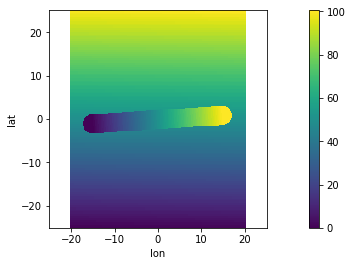

In [9]:
o_c = composite.execute(Coordinates.grid(lat=(-25, 25, 256),
                                         lon=(-25, 25, 256), order=['lat', 'lon']))
figure(4); o_c.plot(); axis('scaled')